### 分词

中文分词(Chinese Word Segmentation) 指的是将一个汉字序列切分成一个一个单独的词。分词就是将连续的字序列按照一定的规范重新组合成词序列的过程。

中文/n 分词/n 是/v其他/p中文/n(信息,n)处理/v 的基础，搜索引擎、机器翻译（MT）、语音合成、自动分类、自动摘要、自动校对等等，都需要用到分词。

### 词性标注

词性标注（Part-of-Speech tagging 戒POS tagging)，又称词类标注戒者简称标注，是指为分词结果中的每个单词标注一个正确的词性的程序，也即确定每个词是名词、动词、形容词戒其他词性的过程。

在汉语中，词性标注比较简单，因为汉语词汇词性多变的情况比较少见，大多词语只有一个词性，戒者出现频次最高的词性远远高于第二位的词性。

据说，只需选取最高频词性，即可实现80%准确率的中文词性标注程序。但80%还不满足需求

不同工具有不同记号。

### 命名实体识别

命名实体识别（Named Entity Recognition，简称NER），又称作“专名识别”，是指识别文本中具有特定意义的实体，主要包括人名、地名、机构名、专有名词等。

一般来说，命名实体识别的任务就是识别出待处理文本中三大类（实体类、时间类和数字类）、七小类（人名、机构名、地名、时间、日期、货币和百分比）命名实体。在不同的顷目中，命名实体类别具有不同的定义。

### 自定义字典词库识别

#### hanlp
注意删除bin缓存文件
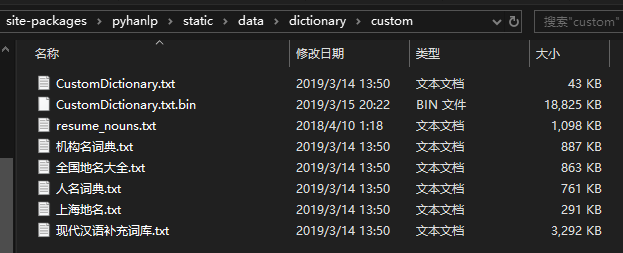

在property文件修改
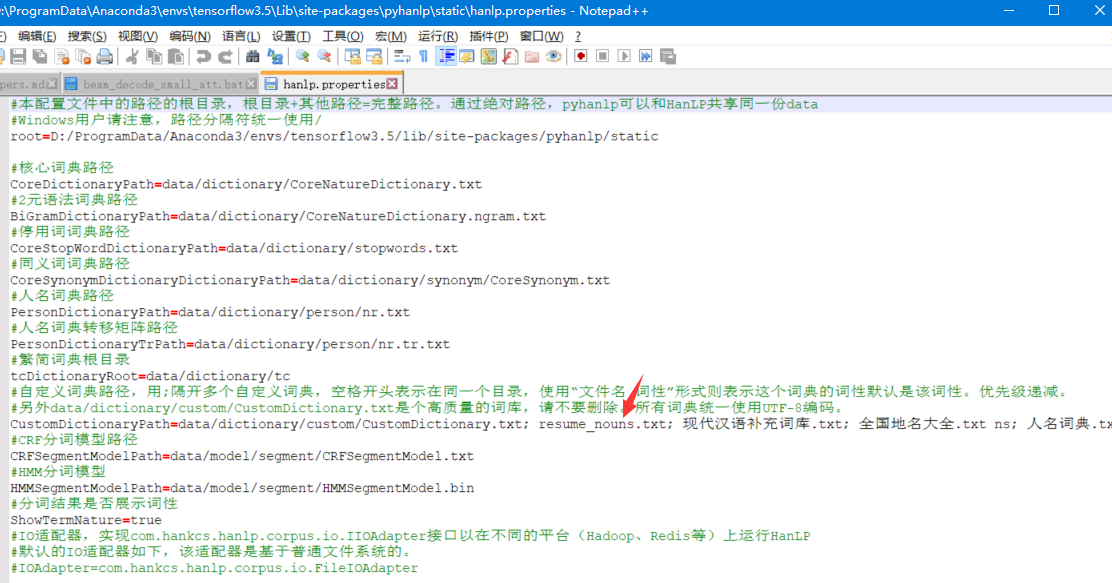

#### jieba

```python
import jieba

# "dict.txt"为userdict文件路径
jieba.load_userdict("dict.txt")

words = jieba.cut(line)
```

### 处理分词不准确，自定义词典

In [3]:
!cat dict.txt

鍙颁腑


In [4]:
import jieba
import re
from pyhanlp import *

#### jieba

In [8]:
# step1：加载用户字典
jieba.load_userdict("dict.txt")

# step2: 调整词频
# 手动
# jieba.add_word(word, freq=None, tag=None)  # Add a word to dictionary.
# 自动
# jieba.suggest_freq('台中', tune=True)  # 修改词频，适应自定义词典
[jieba.suggest_freq(line.strip(), tune=True) for line in open("dict.txt",'r',encoding='utf8')]

def merge_two_list(a, b):
    """合并两个列表"""
    c = []
    len_a, len_b = len(a), len(b)
    minlen = min(len_a, len_b)

    for i in range(minlen):
        c.append(a[i])
        c.append(b[i])

    if len_a > len_b:
        for i in range(minlen, len_a):
            c.append(a[i])
    else:
        for i in range(minlen, len_b):
            c.append(b[i])
    return c


if __name__ == "__main__":
    # 输入
    fp = open("text.txt", "r", encoding="utf8")
    # 输出
    fout = open("result_cut.txt", "w", encoding="utf8")

    # step3：regex匹配
    regex1 = u'(?:[^\u4e00-\u9fa5（）*&……%￥$，,。.@! ！]){1,5}期'
    regex2 = r'(?:[0-9]{1,3}[.]?[0-9]{1,3})%'
    p1 = re.compile(regex1)
    p2 = re.compile(regex2)

    for line in fp.readlines():

        result1 = p1.findall(line)
        if result1:
            line = p1.sub("FLAG1", line) # 替换为FLAG1

        result2 = p2.findall(line)
        if result2:
            line = p2.sub("FLAG2", line) # 替换为FLAG2

        words = jieba.cut(line)
        # words1 = cut_hanlp(line)
        result = " ".join(words)
        
        # 将正则后的结果和jieba.cut的结果合并
        if "FLAG1" in result:
            result = result.split("FLAG1")
            result = merge_two_list(result, result1)
            result = "".join(result)

        if "FLAG2" in result:
            result = result.split("FLAG2")
            result = merge_two_list(result, result2)
            result = "".join(result)
        
        #print(result)
        fout.write(result)
    
    fp.close()
    fout.close()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\qw\AppData\Local\Temp\jieba.cache
Loading model cost 0.938 seconds.
Prefix dict has been built succesfully.


#### hanlp

In [7]:
import os
Tokenizer = JClass('com.hankcs.hanlp.tokenizer.StandardTokenizer')


def sort_dict_by_lenth():
    """字典按词长度排序
    目的：解决识别出现“数据库设计”和“数据库”在识别时只需要识别“数据库设计”
    的冲突情况。
    """
    dict_file = open(
        "D:\ProgramData\Anaconda3\envs\tensorflow3.5\Lib\site-packages\pyhanlp\static"
        + os.sep + "data" + os.sep + "dictionary" + os.sep + "custom" + os.sep
        + "resume_nouns.txt",
        'r',
        encoding='utf8')
    d = {}
    
    # line：(词 词性 词频)
    [d.update({line: len(line.split(" ")[0])}) for line in dict_file]
    
    # 按长度descending排序
    f = sorted(d.items(), key=lambda x: x[1], reverse=True)
    
    dict_file.close()
    
    dict_file = open(
        "D:\ProgramData\Anaconda3\envs\tensorflow3.5\Lib\site-packages\pyhanlp\static"
        + os.sep + "data" + os.sep + "dictionary" + os.sep + "custom" + os.sep
        + "resume_nouns1.txt",
        'w',
        encoding='utf8')
    
    [dict_file.write(item[0]) for item in f]
    
    # 之后删除原resume_nouns.txt文件，用resume_nouns1.txt替换
    dict_file.close()


def cut_hanlp(raw_sentence, return_list=True):
    """分词结果返回list还是生成器（return_list=False）"""
    if len(raw_sentence.strip()) > 0:
        return to_string(raw_sentence) if return_list else iter(
            to_string(raw_sentence))


if __name__ == "__main__":
    # 通过自定义的词库，resume_nouns修改，修改分词结果

    # 输入
    fp = open("text.txt", "r", encoding="utf8")
    # 输出
    fout = open("result_cut_hanlp.txt", "w", encoding="utf8")

    for line in fp.readlines():
        words = cut_hanlp(line)
        result = " ".join(words)
        fout.write(result)
        # print(result)

    fp.close()
    fout.close()

### 按词性筛选
[词性](https://github.com/hankcs/HanLP/blob/master/data/dictionary/other/TagPKU98.csv)

In [ ]:
import pyhanlp
import re

Tokenizer = JClass('com.hankcs.hanlp.tokenizer.StandardTokenizer')

keep_pos = "q,qg,qt,qv,s,t,tg,g,gb,gbc,gc,gg,gm,gp,m,mg,Mg,mq,n,an,vn,ude1,nr,\
            ns,nt,nz,nb,nba,nbc,nbp,nf,ng,nh,nhd,o,nz,nx,ntu,nts,nto,nth,ntch,\
            ntcf,ntcb,ntc,nt,nsf,ns,nrj,nrf,nr2,nr1,nr,nnt,nnd,nn,nmc,nm,nl,\
            nit,nis,nic,ni,nhm,nhd"
keep_pos_nouns = set(keep_pos.split(","))

keep_pos_v = "v,vd,vg,vf,vl,vshi,vyou,vx,vi"
keep_pos_v = set(keep_pos_v.split(","))

keep_pos_p = set(['p', 'pbei', 'pba'])

drop_pos_set = set([
    'xu', 'xx', 'y', 'yg', 'wh', 'wky', 'wkz', 'wp', 'ws', 'wyy', 'wyz', 'wb',
    'u', 'ud', 'ude1', 'ude2', 'ude3', 'udeng', 'udh', 'p', 'rr'
])

# han_pattern=re.compile(r'[^\dA-Za-z\u3007\u4E00-\u9FCB\uE815-\uE864]+')
HanLP = JClass('com.hankcs.hanlp.HanLP')


def to_string(sentence, return_generator=False):
    """hanlp的sentence分词"""
    if return_generator:
        return (word_pos_item.toString().split('/')
                for word_pos_item in Tokenizer.segment(sentence))
    else:
        return " ".join([
            word_pos_item.toString().split('/')[0]
            for word_pos_item in Tokenizer.segment(sentence)
        ])


def seg_sentences(sentence, with_filter=True, return_generator=False):
    """with_filter：是否去掉drop_pos_set词性的词"""
    segs = to_string(sentence, return_generator=return_generator)
    if with_filter:
        g = [
            word_pos_pair[0] for word_pos_pair in segs
            if len(word_pos_pair) == 2 and word_pos_pair[0] != ' '
            and word_pos_pair[1] not in drop_pos_set
        ]
    else:
        g = [
            word_pos_pair[0] for word_pos_pair in segs
            if len(word_pos_pair) == 2 and word_pos_pair[0] != ' '
        ]
    return iter(g) if return_generator else g


if __name__ == "__main__":
    fp = open("text.txt", 'r', encoding='utf8')
    fout = open("filter_out.txt", 'w', encoding='utf8')
    
    for line in fp:
        line = line.strip()
        if len(line) > 0:
            fout.write(' '.join(seg_sentences(line)) + "\n")
    
    fp.close()
    fout.close()

### 基于StanfordNLP关键词命名实体识别实例

In [10]:
import jieba
import re
import nltk,json
import os,gc,re,sys
from itertools import chain
from stanfordcorenlp import StanfordCoreNLP

In [11]:
stanford_nlp = StanfordCoreNLP(r'D:\ProgramData\nlp_package\stanford-corenlp-full-2018-10-05', 
                      lang='zh')

In [12]:
drop_pos_set = set([
    'xu', 'xx', 'y', 'yg', 'wh', 'wky', 'wkz', 'wp', 'ws', 'wyy', 'wyz', 'wb',
    'u', 'ud', 'ude1', 'ude2', 'ude3', 'udeng', 'udh'
])
# han_pattern = re.compile(r'[^\dA-Za-z\u3007\u4E00-\u9FCB\uE815-\uE864]+')


def to_string(sentence, return_generator=False):
    if return_generator:
        return (word_pos_item.toString().split('/')
                for word_pos_item in Tokenizer.segment(sentence))
    else:
        
        return [(word_pos_item.toString().split('/')[0],
                 word_pos_item.toString().split('/')[1])
                for word_pos_item in Tokenizer.segment(sentence)]


def to_string_hanlp(sentence, return_generator=False):
    """可保留词性的to_string"""
    if return_generator:
        return (word_pos_item.toString().split('/')
                for word_pos_item in HanLP.segment(sentence))
    else:
        return [(word_pos_item.toString().split('/')[0],
                 word_pos_item.toString().split('/')[1])
                for word_pos_item in Tokenizer.segment(sentence)]


def ner_stanford(raw_sentence, return_list=True):
    """ner结果列表"""
    if len(raw_sentence.strip()) > 0:
        return stanford_nlp.ner(raw_sentence) if return_list else iter(
            stanford_nlp.ner(raw_sentence))


def ner_hanlp(raw_sentence, return_list=True):
    """hanlp ner结果列表"""
    if len(raw_sentence.strip()) > 0:
        return NLPTokenizer.segment(raw_sentence) if return_list else iter(
            NLPTokenizer.segment(raw_sentence))


def cut_stanford(raw_sentence, return_list=True):
    """stanford分词结果列表"""
    if len(raw_sentence.strip()) > 0:
        return stanford_nlp.pos_tag(raw_sentence) if return_list else iter(
            stanford_nlp.pos_tag(raw_sentence))

In [13]:
keep_pos = "q,qg,qt,qv,s,t,tg,g,gb,gbc,gc,gg,gm,gp,m,mg,Mg,mq,n,an,vn,ude1,\
            nr,ns,nt,nz,nb,nba,nbc,nbp,nf,ng,nh,nhd,o,nz,nx,ntu,nts,nto,nth,\
            ntch,ntcf,ntcb,ntc,nt,nsf,ns,nrj,nrf,nr2,nr1,nr,nnt,nnd,nn,nmc,\
            nm,nl,nit,nis,nic,ni,nhm,nhd"
keep_pos_nouns = set(keep_pos.split(","))
keep_pos_v = "v,vd,vg,vf,vl,vshi,vyou,vx,vi"
keep_pos_v = set(keep_pos_v.split(","))
keep_pos_p = set(['p', 'pbei', 'pba'])


def get_stanford_ner_nodes(parent):
    """遍历树结构，将目标类型的节点元素取出，输出字典"""
    date = ''
    org = ''
    loc = ''
    for node in parent:
        if type(node) is nltk.Tree:
            if node.label() == 'DATE':
                date = date + " " + ''.join([i[0] for i in node])
            elif node.label() == 'ORGANIZATIONL':
                org = org + " " + ''.join([i[0] for i in node])
            elif node.label() == 'LOCATION':
                loc = loc + " " + ''.join([i[0] for i in node])
    if len(date) > 0 or len(org) > 0 or len(loc) > 0:
        return {'date': date, 'org': org, 'loc': loc}
    else:
        return {}


def grammer_parse(raw_sentence=None, file_object=None):
    """解析函数，完成对关键词的解析"""
    #assert grammer_type in set(['hanlp_keep','stanford_ner_drop','stanford_pos_drop'])
    if len(raw_sentence.strip()) < 1:
        return False
    
    # 解析格式
    # +:一个或者多个； ?：0或者1个
    # *：任意个；  <MISC>：符号，比如“-”
    grammer_dict=\
    {
         'stanford_ner_drop': r"""
        DATE:{<DATE>+<MISC>?<DATE>*}
            {<DATE>+}
            {<TIME>+}
        ORGANIZATIONL:{<ORGANIZATION>+}
        LOCATION:{<LOCATION|STATE_OR_PROVINCE|CITY|COUNTRY>+}
        """
    }

    stanford_ner_drop_rp = nltk.RegexpParser(grammer_dict['stanford_ner_drop'])
    try:
        # 对ner结果解析，输出树结构，.draw()方法可视化
        stanford_ner_drop_result = stanford_ner_drop_rp.parse(
            ner_stanford(raw_sentence))
    except:
        # 问题句子输出
        print("the error sentence is {}".format(raw_sentence))
    else:
        # 没问题时，将这一句的解析结果写入文件
        stanford_keep_drop_dict = get_stanford_ner_nodes(
            stanford_ner_drop_result)
        if len(stanford_keep_drop_dict) > 0:
            file_object.write(
                json.dumps(
                    stanford_keep_drop_dict,
                    skipkeys=False,
                    ensure_ascii=False,
                    check_circular=True,
                    allow_nan=True,
                    cls=None,
                    indent=4,
                    separators=None,
                    default=None,
                    sort_keys=False))

In [14]:
if __name__ == "__main__":
    fp = open("text.txt", 'r', encoding='utf8')
    fout = open("ner_out.txt", 'w', encoding='utf8')
    
    # 按句解析
    [grammer_parse(line.strip(), fout) for line in fp if len(line.strip())>0]
    
    fp.close()
    fout.close()

### 结合搜索引擎的使用示例

使用whoosh包进行演示

In [ ]:
from __future__ import unicode_literals
import jieba.analyse
import sys, os
sys.path.append("../")
from whoosh.index import create_in, open_dir
from whoosh.fields import *
from whoosh.qparser import QueryParser


analyzer = jieba.analyse.ChineseAnalyzer()
schema = Schema(
    title=TEXT(stored=True),
    path=ID(stored=True),
    content=TEXT(stored=True, analyzer=analyzer))

if not os.path.exists("tmp"):
    os.mkdir("tmp")

ix = create_in("tmp", schema)  # for create new index
#ix = open_dir("tmp") # for read only
writer = ix.writer()

# 加入待搜索文档
writer.add_document(
    title="document1",
    path="/a",
    content="This is the first document we’ve added!")

writer.add_document(
    title="document2",
    path="/b",
    content="The second one 你 中文测试中文 is even more interesting! 吃水果")

writer.add_document(title="document3", path="/c", content="买水果然后来世博园。")

writer.add_document(
    title="document4",
    path="/c",
    content="工信处女干事每月经过下属科室都要亲口交代24口交换机等技术性器件的安装工作")

writer.add_document(title="document4", path="/c", content="咱俩交换一下吧。")
writer.commit()


# 搜索
searcher = ix.searcher()
parser = QueryParser("content", schema=ix.schema)

for keyword in ("水果世博园", "你", "first", "中文", "交换机", "交换"):
    print(keyword + "的结果为如下：")
    q = parser.parse(keyword)
    results = searcher.search(q)
    for hit in results:
        print(hit.highlights("content"))
    print("\n--------------分割线--------------\n")